In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import censusdata
import requests

df = pd.read_csv('WeatherEvents_Jan2016-Dec2022.csv')

url = "https://api.census.gov/data/2019/pep/population?get=POP,NAME&for=state:*&key=e7e2a7d629dfc217eb580b56c06cf14a1e428657"
response = requests.get(url)
census_data = response.json()

  EventId  Type Severity       StartTime(UTC)         EndTime(UTC)  \
0     W-1  Snow    Light  2016-01-06 23:14:00  2016-01-07 00:34:00   
1     W-2  Snow    Light  2016-01-07 04:14:00  2016-01-07 04:54:00   
2     W-3  Snow    Light  2016-01-07 05:54:00  2016-01-07 15:34:00   
3     W-4  Snow    Light  2016-01-08 05:34:00  2016-01-08 05:54:00   
4     W-5  Snow    Light  2016-01-08 13:54:00  2016-01-08 15:54:00   

   Precipitation(in)     TimeZone AirportCode  LocationLat  LocationLng  \
0               0.00  US/Mountain        K04V      38.0972    -106.1689   
1               0.00  US/Mountain        K04V      38.0972    -106.1689   
2               0.03  US/Mountain        K04V      38.0972    -106.1689   
3               0.00  US/Mountain        K04V      38.0972    -106.1689   
4               0.00  US/Mountain        K04V      38.0972    -106.1689   

       City    County State  ZipCode  
0  Saguache  Saguache    CO  81149.0  
1  Saguache  Saguache    CO  81149.0  
2  Saguache

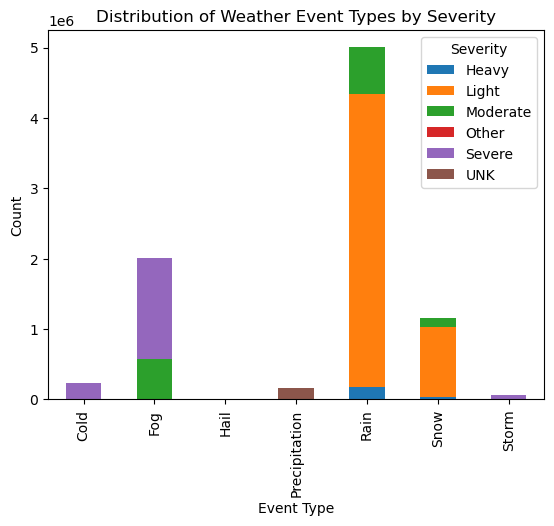

In [96]:
print(df.head())

print(df.info())

print(df.describe())

print(df.isnull().sum())

type_severity = df.groupby(['Type', 'Severity']).size().unstack(fill_value=0)

type_severity.plot(kind='bar', stacked=True)
plt.title('Distribution of Weather Event Types by Severity')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

In [97]:
population_data = pd.DataFrame(census_data[1:], columns=census_data[0])
print(population_data.head())

        POP        NAME state
0   4903185     Alabama    01
1    731545      Alaska    02
2   7278717     Arizona    04
3   3017804    Arkansas    05
4  39512223  California    06


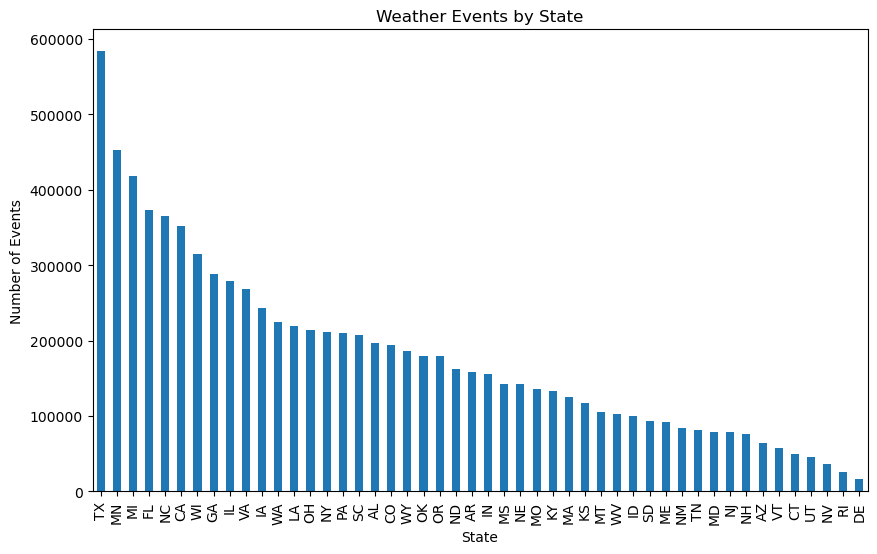

In [98]:
state_counts = df['State'].value_counts()

state_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Weather Events by State')
plt.xlabel('State')
plt.ylabel('Number of Events')
plt.show()

In [99]:
data = censusdata.download('acs5', 2019,
                           censusdata.censusgeo([('state', '*')]),
                           ['B01003_001E', 'B01001_001E'])

data.columns = ['Population', 'Land_Area']
print(data.head())

                                          Population  Land_Area
Alabama: Summary level: 040, state:01        4876250    4876250
Alaska: Summary level: 040, state:02          737068     737068
Arizona: Summary level: 040, state:04        7050299    7050299
Arkansas: Summary level: 040, state:05       2999370    2999370
California: Summary level: 040, state:06    39283497   39283497


            State  EventCount       POP            NAME state  \
0           Texas      583234  28995881           Texas    48   
1       Minnesota      452099   5639632       Minnesota    27   
2        Michigan      418795   9986857        Michigan    26   
3         Florida      373421  21477737         Florida    12   
4  North Carolina      364605  10488084  North Carolina    37   

   Events_Per_Capita  
0           0.020114  
1           0.080165  
2           0.041935  
3           0.017386  
4           0.034764  
Merged Data Shape: (48, 6)


<Figure size 1000x600 with 0 Axes>

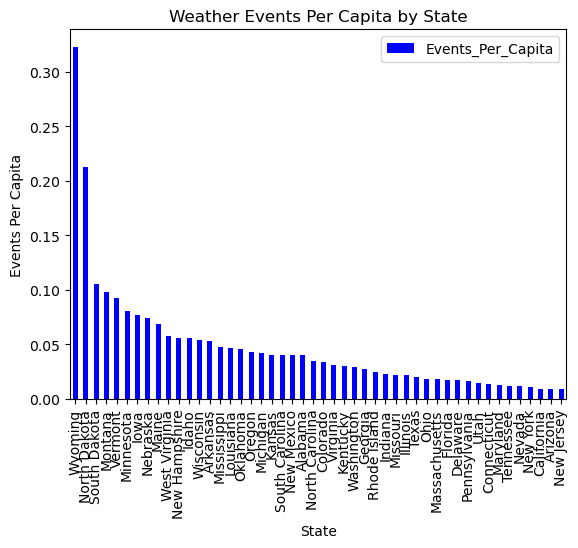

In [100]:
state_abbrev = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}
df['State'] = df['State'].map(state_abbrev)

event_counts = df['State'].value_counts().reset_index()
event_counts.columns = ['State', 'EventCount']

population_data = pd.DataFrame(census_data[1:], columns=census_data[0])

combined_data = pd.merge(event_counts, population_data, left_on='State', right_on='NAME')

combined_data['Events_Per_Capita'] = combined_data['EventCount'] / combined_data['POP'].astype(float)
print(combined_data.head())
print("Merged Data Shape:", combined_data.shape)

plt.figure(figsize=(10, 6))
combined_data.sort_values('Events_Per_Capita', ascending=False).plot.bar(x='State', y='Events_Per_Capita', color='blue')
plt.title('Weather Events Per Capita by State')
plt.xlabel('State')
plt.ylabel('Events Per Capita')
plt.xticks()
plt.show()

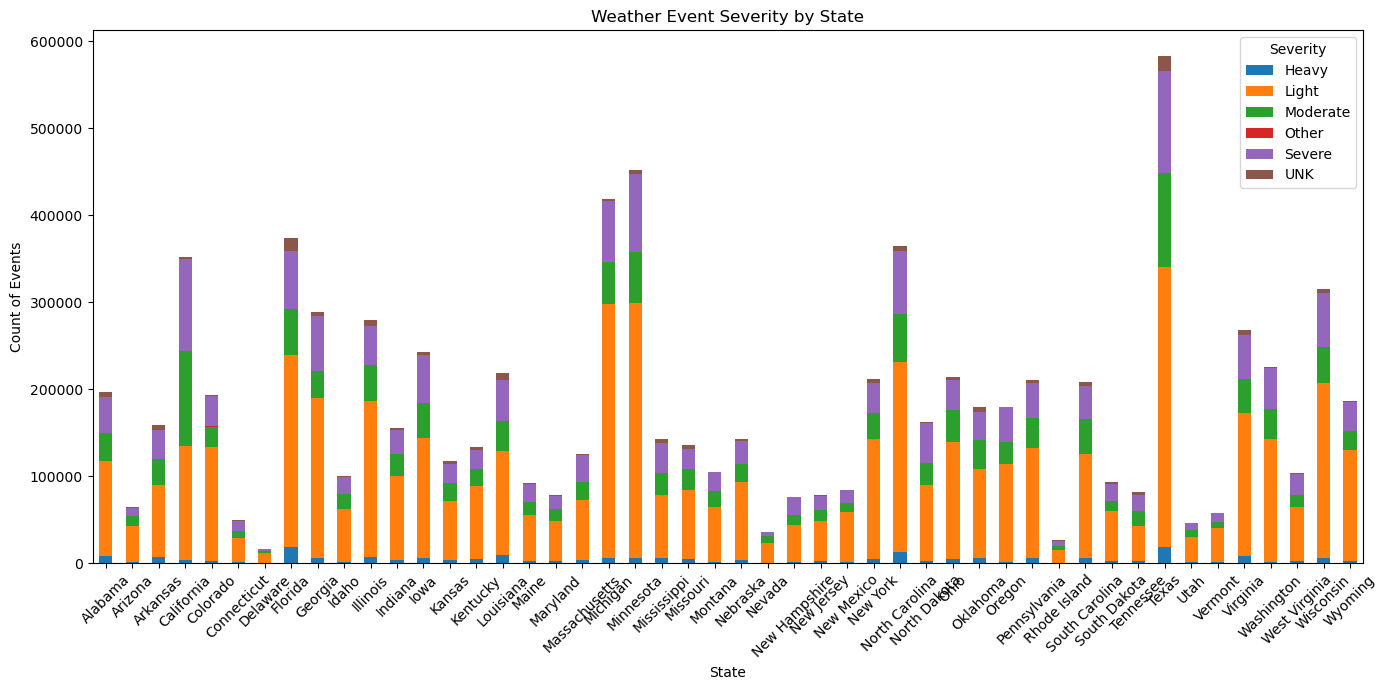

In [101]:
severity_counts=df.groupby(['State', 'Severity']).size().unstack(fill_value=0)
severity_counts.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Weather Event Severity by State')
plt.xlabel('State')
plt.ylabel('Count of Events')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

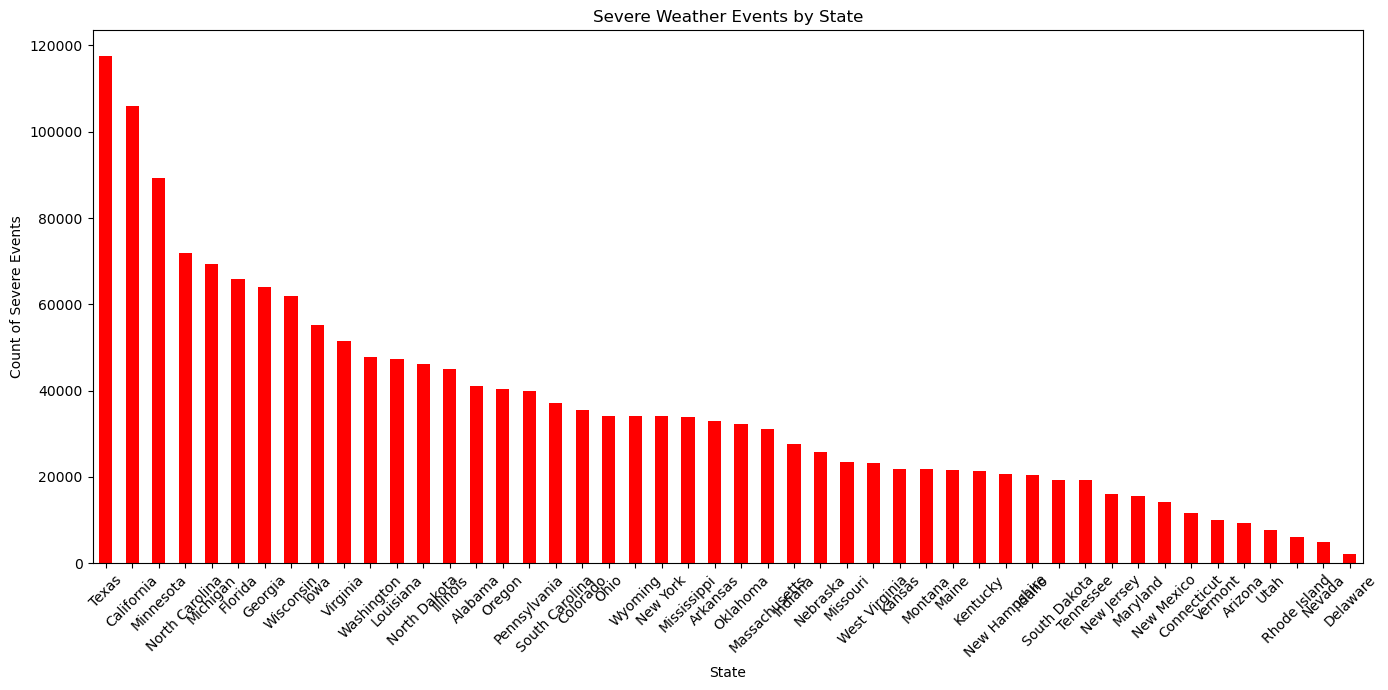

In [102]:
severe_counts = severity_counts['Severe']

severe_counts_sorted = severe_counts.sort_values(ascending=False)

severe_counts_sorted.plot(kind='bar', figsize=(14, 7), color='red')
plt.title('Severe Weather Events by State')
plt.xlabel('State')
plt.ylabel('Count of Severe Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

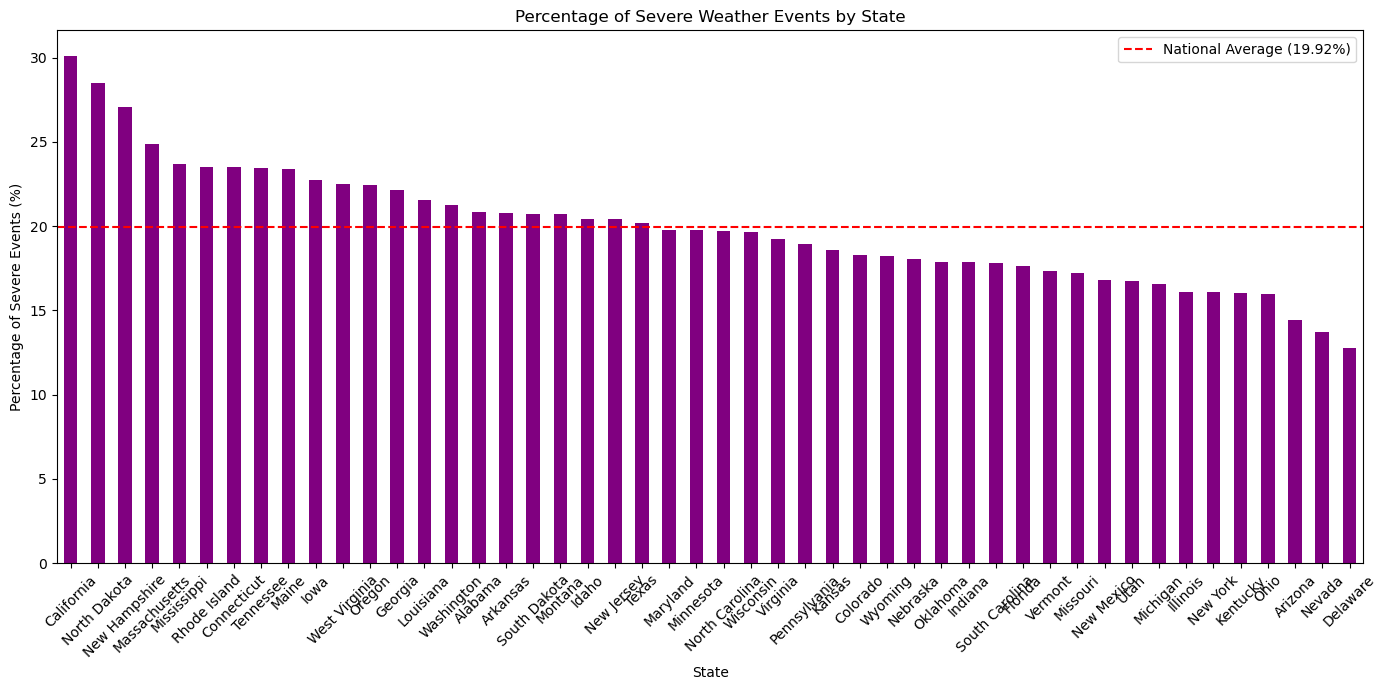

In [103]:
total_events = severity_counts.sum(axis=1)
severe_events = severity_counts['Severe']

percentage_severe = (severe_events / total_events) * 100

percentage_severe_sorted = percentage_severe.sort_values(ascending=False)
national_average = percentage_severe.mean()

percentage_severe_sorted.plot(kind='bar', figsize=(14, 7), color='purple')
plt.title('Percentage of Severe Weather Events by State')
plt.xlabel('State')
plt.ylabel('Percentage of Severe Events (%)')
plt.xticks(rotation=45)
plt.axhline(y=national_average, color='r', linestyle='--', label=f'National Average ({national_average:.2f}%)')
plt.legend()
plt.tight_layout()
plt.show()